In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("pv_hourly2019_cologne.csv", sep =";")
df['electricity'].astype(float)
df['electricity'] = df['electricity']/1000
df.drop(['local_time'], axis=1, inplace=True)

df['datetime'] = pd.to_datetime(df['time'])
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

df

time  electricity            datetime        date  hour
0     2019-01-01 00:00          0.0 2019-01-01 00:00:00  2019-01-01     0
1     2019-01-01 01:00          0.0 2019-01-01 01:00:00  2019-01-01     1
2     2019-01-01 02:00          0.0 2019-01-01 02:00:00  2019-01-01     2
3     2019-01-01 03:00          0.0 2019-01-01 03:00:00  2019-01-01     3
4     2019-01-01 04:00          0.0 2019-01-01 04:00:00  2019-01-01     4
...                ...          ...                 ...         ...   ...
8755  2019-12-31 19:00          0.0 2019-12-31 19:00:00  2019-12-31    19
8756  2019-12-31 20:00          0.0 2019-12-31 20:00:00  2019-12-31    20
8757  2019-12-31 21:00          0.0 2019-12-31 21:00:00  2019-12-31    21
8758  2019-12-31 22:00          0.0 2019-12-31 22:00:00  2019-12-31    22
8759  2019-12-31 23:00          0.0 2019-12-31 23:00:00  2019-12-31    23

[8760 rows x 5 columns]

In [21]:
daily_profiles = df.pivot_table(index='date', columns='hour', values='electricity')
daily_profiles = daily_profiles.dropna()

X = daily_profiles.values

daily_profiles

hour         0    1    2    3    4    5    6      7      8      9   ...  \
date                                                                ...   
2019-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.002  0.007  ...   
2019-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.102  0.215  ...   
2019-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.009  0.036  ...   
2019-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.003  0.007  ...   
2019-01-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.008  0.034  ...   
...         ...  ...  ...  ...  ...  ...  ...    ...    ...    ...  ...   
2019-12-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.041  0.170  ...   
2019-12-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.071  0.159  ...   
2019-12-29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.016  0.060  ...   
2019-12-30  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.001  0.181  0.367  ...   
2019-12-31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.009  0.036  ...   

hour           14     15   16   17   18   19   20   21   22   23  
date                                                              
2019-01-01  0.019  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-01-02  0.149  0.003  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-01-03  0.026  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-01-04  0.010  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-01-05  0.005  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...           ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
2019-12-27  0.124  0.001  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-12-28  0.023  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-12-29  0.044  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-12-30  0.160  0.005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-12-31  0.030  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[365 rows x 24 columns]

In [17]:
# Scenario Reduction with K-Means
num_clusters = 50  # choose 

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
reduced_profiles = kmeans.cluster_centers_

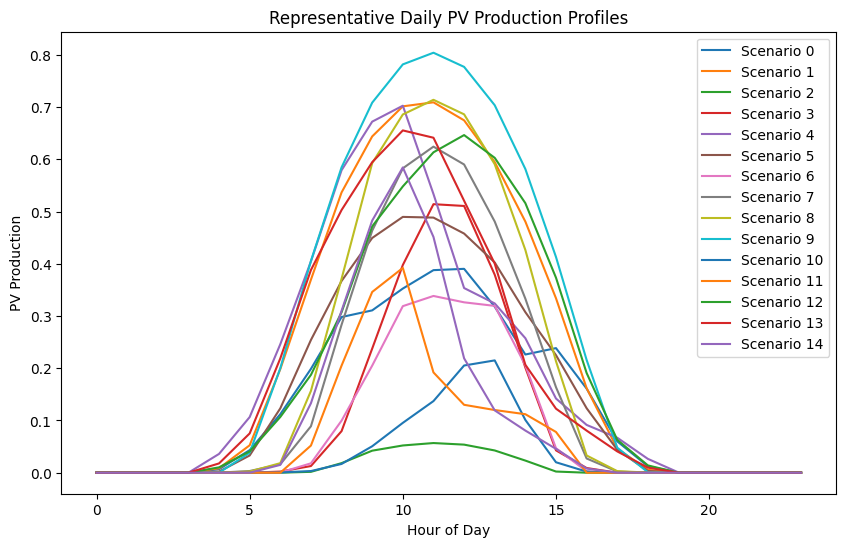

In [23]:
labels, counts = np.unique(kmeans.labels_, return_counts=True)
weights = counts / counts.sum()

# Create a DataFrame for the reduced scenarios for easy viewing or export.
reduced_df = pd.DataFrame(reduced_profiles, columns=[f"Hour_{h}" for h in range(24)])
reduced_df['weight'] = weights

# 4. Optional: Plot a few representative daily profiles.
plt.figure(figsize=(10, 6))
for i in range(min(15, num_clusters)):
    plt.plot(range(24), reduced_profiles[i], label=f"Scenario {i}")
plt.xlabel("Hour of Day")
plt.ylabel("PV Production")
plt.title("Representative Daily PV Production Profiles")
plt.legend()
plt.show()
